## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [21]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
boston_cts = boston_features.iloc[:,:10].drop('CHAS', axis=1)

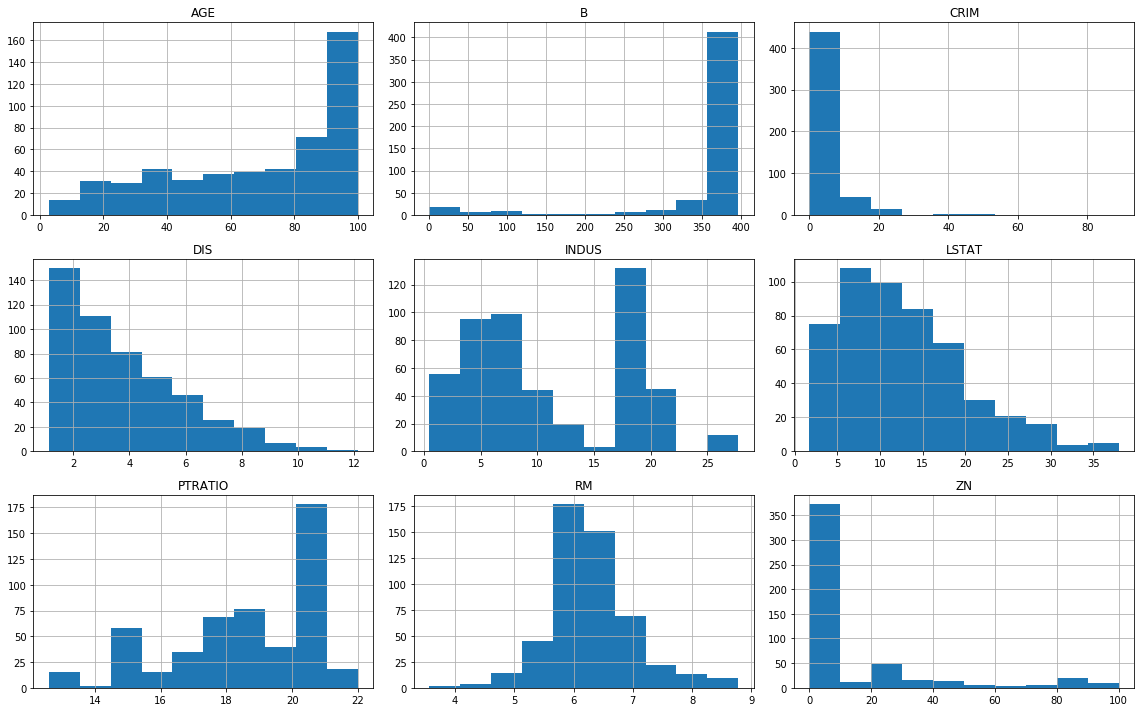

In [23]:
import matplotlib.pyplot as plt
boston_cts.hist(figsize=(16,10))
plt.tight_layout();


## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

In [24]:
import numpy as np
boston_cts.applymap(np.log)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:6070: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object).values, func)


,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,-5.064036,2.890372,0.837248,1.883275,4.177459,1.408545,2.727853,5.983684,1.605430
1,-3.600502,-inf,1.955860,1.859574,4.368181,1.602836,2.879198,5.983684,2.212660
2,-3.601235,-inf,1.955860,1.971996,4.112512,1.602836,2.879198,5.973377,1.393766
3,-3.430523,-inf,0.779325,1.945624,3.824284,1.802073,2.928524,5.977949,1.078410
4,-2.672924,-inf,0.779325,1.966693,3.992681,1.802073,2.928524,5.983684,1.673351
5,-3.511570,-inf,0.779325,1.860975,4.072440,1.802073,2.928524,5.976655,1.650580
6,-2.427128,2.525729,2.063058,1.793757,4.198705,1.715688,2.721295,5.980404,2.520113
7,-1.934130,2.525729,2.063058,1.820023,4.565389,1.783475,2.721295,5.983684,2.952303
8,-1.554760,2.525729,2.063058,1.728287,4.605170,1.805350,2.721295,5.957468,3.398861
9,-1.771722,2.525729,2.063058,1.792426,4.453184,1.885872,2.721295,5.957675,2.839078


"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.